<h3>1. Import module yang dibutuhkan</h3>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [ ]:
imagePaths = 'dataset\\animal_elw\\'
label_list = ['elephant', 'lion']
data = []
labels = []

In [ ]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [ ]:
np.array(data).shape

(200, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [ ]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [ ]:
print(labels)

['elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'eleph

In [ ]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (160, 32, 32, 3)
Ukuran data test = (40, 32, 32, 3)


<h3>5. Build CNN Architecture</h3>

In [ ]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 50)        6450      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [ ]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [ ]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
5/5 [==============================] - 1s 134ms/step - loss: 0.6922 - accuracy: 0.5194 - val_loss: 0.7140 - val_accuracy: 0.4750
Epoch 2/100
5/5 [==============================] - 0s 73ms/step - loss: 0.6668 - accuracy: 0.5660 - val_loss: 0.5759 - val_accuracy: 0.6750
Epoch 3/100
5/5 [==============================] - 0s 69ms/step - loss: 0.6311 - accuracy: 0.6472 - val_loss: 0.5652 - val_accuracy: 0.7000
Epoch 4/100
5/5 [==============================] - 0s 73ms/step - loss: 0.5749 - accuracy: 0.6930 - val_loss: 0.4838 - val_accuracy: 0.9500
Epoch 5/100
5/5 [==============================] - 0s 68ms/step - loss: 0.4787 - accuracy: 0.8244 - val_loss: 0.4334 - val_accuracy: 0.9250
Epoch 6/100
5/5 [==============================] - 0s 76ms/step - loss: 0.4193 - accuracy: 0.8596 - val_loss: 0.3866 - val_accuracy: 0.8500
Epoch 7/100
5/5 [==============================] - 0s 78ms/step - loss: 0.3883 - accuracy: 0.8353 - val_loss: 0.3544 - val_accuracy: 0.8500
Epoch 8/100
5/5 [==

5/5 [==============================] - 0s 68ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1837 - val_accuracy: 0.9500
Epoch 60/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.1777 - val_accuracy: 0.9500
Epoch 61/100
5/5 [==============================] - 0s 69ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1804 - val_accuracy: 0.9250
Epoch 62/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1530 - val_accuracy: 0.9250
Epoch 63/100
5/5 [==============================] - 0s 81ms/step - loss: 0.0101 - accuracy: 0.9923 - val_loss: 0.1929 - val_accuracy: 0.9250
Epoch 64/100
5/5 [==============================] - 0s 83ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1612 - val_accuracy: 0.9250
Epoch 65/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9500
Epoch 66/100
5/5 [========

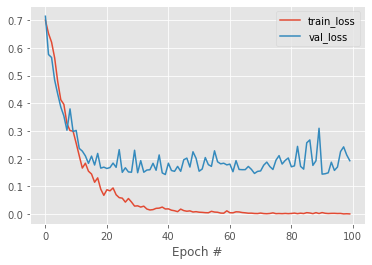

In [ ]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [ ]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

    elephant       0.95      0.95      0.95        21
        lion       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_lion.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.9999999]]


In [ ]:
if q_pred<=0.5 :
    target = "Elephant"
else :
    target = "Lion"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose